In [ ]:
# who was beinig polled and what was their party affiliation
# did the poll results favor Romny or obama
# how did the undecided voters effect the poll
# can we account for the undecided voters
#  how did the voter sentiment change over time
# can we see an effect in the polls from the debates


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from __future__ import division

In [6]:
import requests

In [9]:
# from StringIO import StringIO
from io import StringIO


In [36]:
# url = "https://www.kaggle.com/datasets/kadser/2012-election-obama-vs-romney?select=Election_Donor_Data.csv"
url = "https://www.kaggle.com/datasets/kadser/2012-election-obama-vs-romney?select=Election_Donor_Data.csv"

In [37]:
source = requests.get(url).text

In [38]:
poll_data = StringIO(source)

In [39]:
# poll_df = pd.read_csv(poll_data)

In [40]:
election_df = pd.read_csv('E:\datascience\DataScience Project code/2012-general-election-romney-vs-obama.csv', sep=',')

In [41]:
election_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [42]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                590 non-null    object 
 1   Start Date              590 non-null    object 
 2   End Date                590 non-null    object 
 3   Entry Date/Time (ET)    590 non-null    object 
 4   Number of Observations  568 non-null    float64
 5   Population              590 non-null    object 
 6   Mode                    590 non-null    object 
 7   Obama                   590 non-null    float64
 8   Romney                  590 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            590 non-null    object 
 12  Source URL              588 non-null    object 
 13  Partisan                590 non-null    object 
 14  Affiliation             590 non-null    ob

<AxesSubplot:xlabel='Affiliation', ylabel='count'>

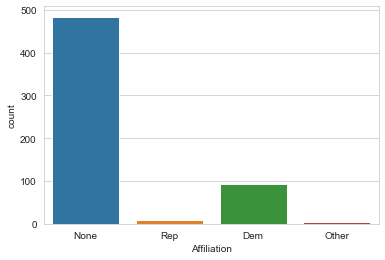

In [44]:
sns.countplot("Affiliation",data=election_df)

<AxesSubplot:xlabel='Affiliation', ylabel='count'>

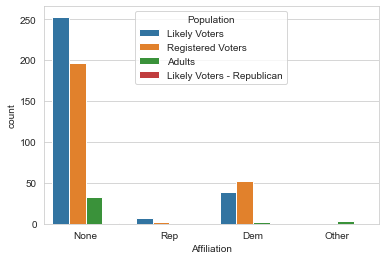

In [45]:
sns.countplot('Affiliation',data=election_df,hue='Population')

In [47]:
avg = pd.DataFrame(election_df.mean())


C:\Users\defaultuser0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [48]:
avg.head()

,0
Number of Observations,1295.390845
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990


In [49]:
avg.drop('Number of Observations',axis=0,inplace=True)

In [50]:
avg.head()

,0
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990
Question Text,NaN


In [51]:
std= pd.DataFrame(election_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

C:\Users\defaultuser0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [52]:
std.head()

,0
Obama,2.447069
Romney,2.925320
Undecided,3.698614
Other,2.721318
Question Text,NaN


<AxesSubplot:>

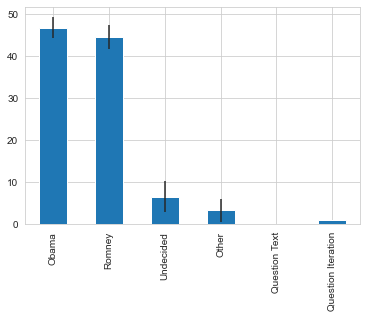

In [53]:
avg.plot(yerr=std,kind='bar',legend=False)

In [54]:
poll_avg = pd.concat([avg,std],axis=1)

In [55]:
poll_avg

,0,0
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


In [56]:
poll_avg.columns = ['Average','STD']

In [57]:
poll_avg

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


<AxesSubplot:xlabel='End Date'>

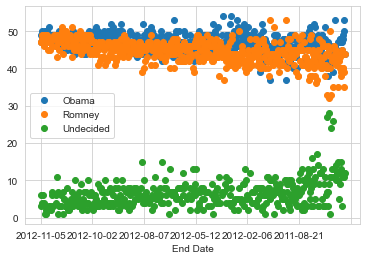

In [59]:
election_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [60]:
from datetime import datetime

In [62]:
election_df['Difference'] =(election_df.Obama - election_df.Romney)/100
election_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [63]:
election_df = election_df.groupby(['Start Date'],as_index=False).mean()

In [64]:
election_df

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.000000,44.00,44.00,12.000000,NaN,NaN,1.0,0.0000
1,2009-04-17,686.000000,50.00,39.00,11.000000,NaN,NaN,1.0,0.1100
2,2009-05-14,1000.000000,53.00,35.00,12.000000,NaN,NaN,1.0,0.1800
3,2009-06-12,638.000000,48.00,40.00,12.000000,NaN,NaN,1.0,0.0800
4,2009-07-15,577.000000,49.00,40.00,11.000000,NaN,NaN,1.0,0.0900
...,...,...,...,...,...,...,...,...,...
356,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,NaN,1.0,0.0150
357,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,NaN,1.0,0.0175
358,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,NaN,1.0,0.0075
359,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,NaN,1.0,0.0050


<AxesSubplot:xlabel='Start Date'>

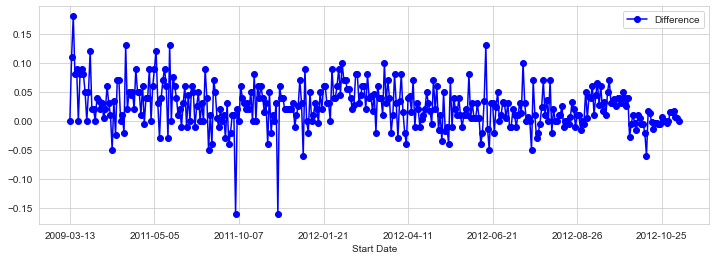

In [67]:
election_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='blue')

In [73]:
row_in = 0
xlimit = []

for date in election_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in +=1

print (max(xlimit))
print (min(xlimit))

356
329


<AxesSubplot:xlabel='Start Date'>

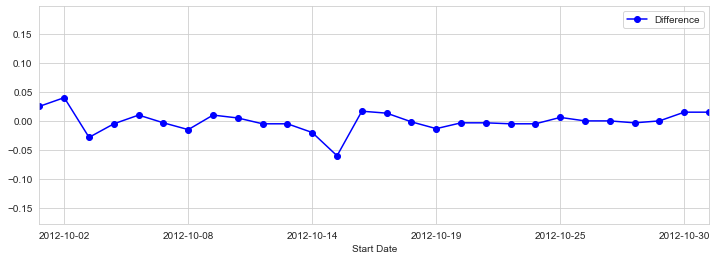

In [75]:
election_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='blue',xlim=(329,356))

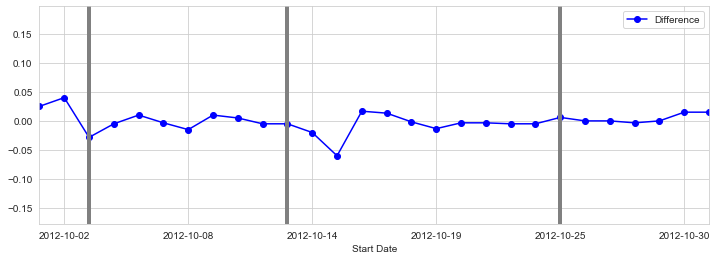

In [79]:
election_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='blue',xlim=(329,356))

# oct 3rd
plt.axvline(x=329+2,linewidth=4,color='gray')
# oct 11th
plt.axvline(x=329+10,linewidth=4,color='gray')
# oct 22nd
plt.axvline(x=329+21,linewidth=4,color='gray')

In [80]:
# i.e in first speech obama decrease sentiment, after second speech sentiment was increased

In [ ]:
don_df = 